In [188]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.externals.six import StringIO 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.ensemble import RandomForestClassifier

In [7]:
filename = r"C:\Users\abhib\Desktop\diabetes.csv"
data=pd.read_csv(filename)
#dropping 0 values
data = data.drop(data[data['Glucose'] == 0].index)
data = data.drop(data[data['SkinThickness'] == 0].index) 
data = data.drop(data[data['BloodPressure'] == 0].index) 
data = data.drop(data[data['BMI'] == 0].index)
data = data.drop(data[data['Insulin'] == 0].index)

In [8]:
data['Outcome'].describe()

count    392.000000
mean       0.331633
std        0.471401
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

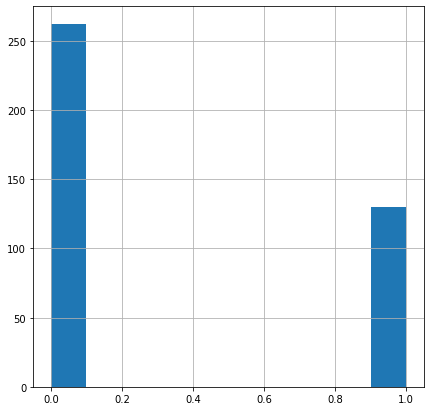

In [9]:
data['Outcome'].hist(figsize=(7,7))

In [10]:
data['Pregnancies'].describe()

count    392.000000
mean       3.301020
std        3.211424
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       17.000000
Name: Pregnancies, dtype: float64

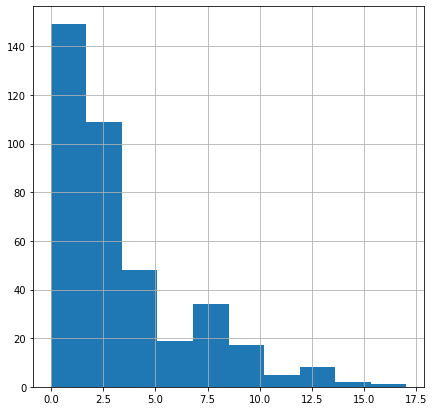

In [12]:
data['Pregnancies'].hist(figsize=(7,7))

In [14]:
data['Glucose'].describe()

count    392.000000
mean     122.627551
std       30.860781
min       56.000000
25%       99.000000
50%      119.000000
75%      143.000000
max      198.000000
Name: Glucose, dtype: float64

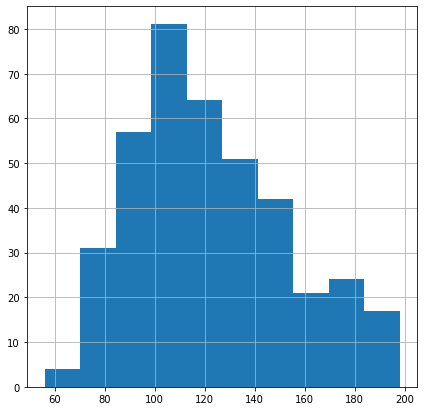

In [15]:
data['Glucose'].hist(figsize=(7,7))

In [16]:
data['BloodPressure'].describe()

count    392.000000
mean      70.663265
std       12.496092
min       24.000000
25%       62.000000
50%       70.000000
75%       78.000000
max      110.000000
Name: BloodPressure, dtype: float64

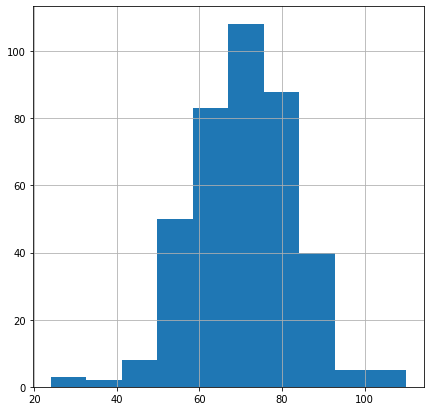

In [17]:
data['BloodPressure'].hist(figsize=(7,7))

In [18]:
data['SkinThickness'].describe()

count    392.000000
mean      29.145408
std       10.516424
min        7.000000
25%       21.000000
50%       29.000000
75%       37.000000
max       63.000000
Name: SkinThickness, dtype: float64

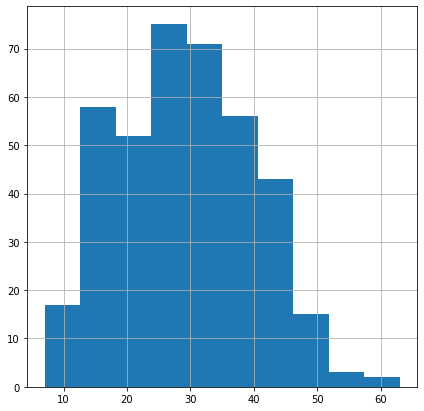

In [20]:
data['SkinThickness'].hist(figsize=(7,7))

In [21]:
data['Insulin'].describe()

count    392.000000
mean     156.056122
std      118.841690
min       14.000000
25%       76.750000
50%      125.500000
75%      190.000000
max      846.000000
Name: Insulin, dtype: float64

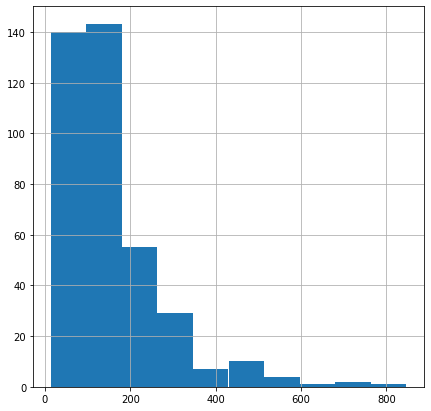

In [22]:
data['Insulin'].hist(figsize=(7,7))

In [23]:
data['BMI'].describe()

count    392.000000
mean      33.086224
std        7.027659
min       18.200000
25%       28.400000
50%       33.200000
75%       37.100000
max       67.100000
Name: BMI, dtype: float64

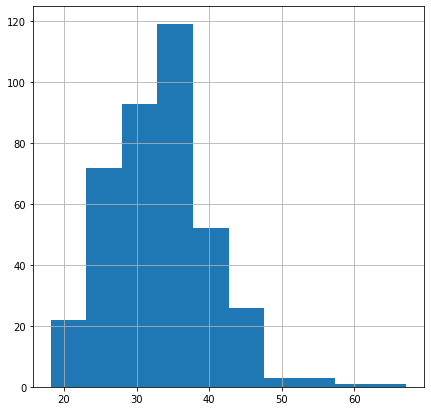

In [24]:
data['BMI'].hist(figsize=(7,7))

In [25]:
data['DiabetesPedigreeFunction'].describe()

count    392.000000
mean       0.523046
std        0.345488
min        0.085000
25%        0.269750
50%        0.449500
75%        0.687000
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

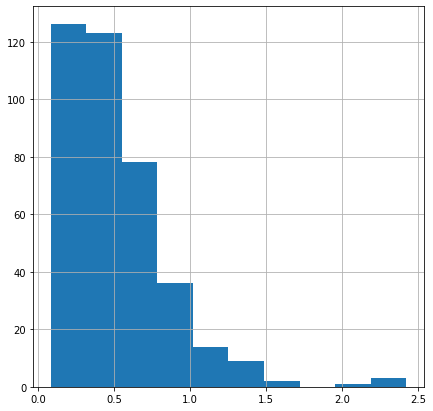

In [26]:
data['DiabetesPedigreeFunction'].hist(figsize=(7,7))

In [27]:
data['Age'].describe()

count    392.000000
mean      30.864796
std       10.200777
min       21.000000
25%       23.000000
50%       27.000000
75%       36.000000
max       81.000000
Name: Age, dtype: float64

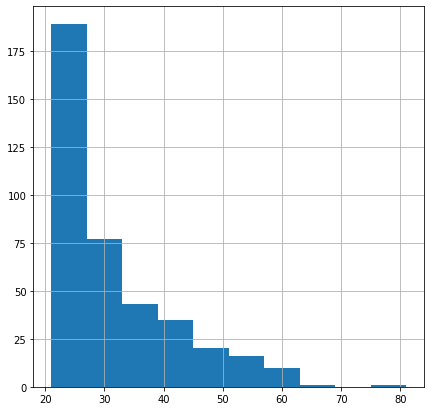

In [28]:
data['Age'].hist(figsize=(7,7))

In [29]:
def plot_diabetic_per_attribute(data, feature):
    grouped_by_Outcome = data[feature].groupby(data["Outcome"])
    diabetic_per_feature = pd.DataFrame({"Diabetic": grouped_by_Outcome.get_group(1),
                                        "Not Diabetic": grouped_by_Outcome.get_group(0),
                                        })
    hist = diabetic_per_feature.plot.hist(bins=60, alpha=0.6)
    hist.set_xlabel(feature)
    plt.show()

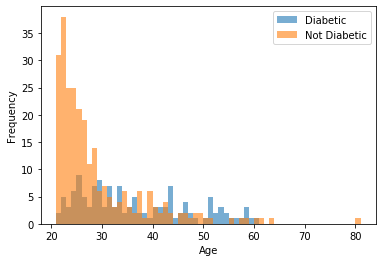

In [30]:
plot_diabetic_per_attribute(data, "Age")

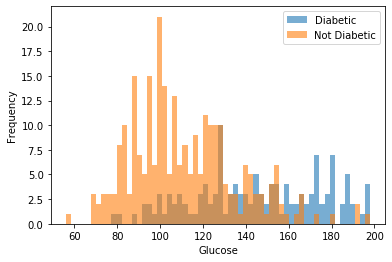

In [31]:
plot_diabetic_per_attribute(data, "Glucose")

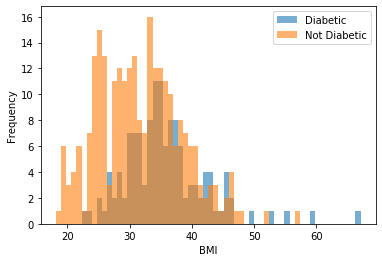

In [32]:
plot_diabetic_per_attribute(data, "BMI")

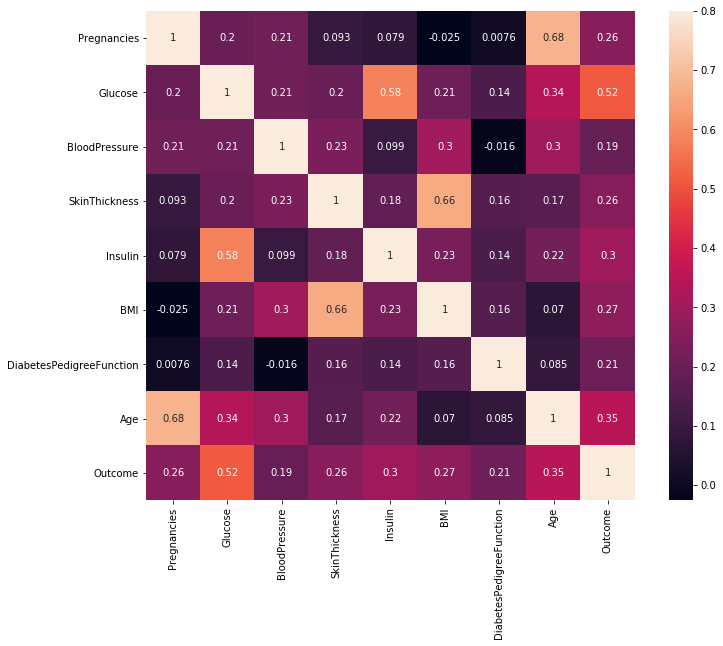

In [33]:
import seaborn as sns 

corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, cbar=True, annot=True, square=True, vmax=.8);

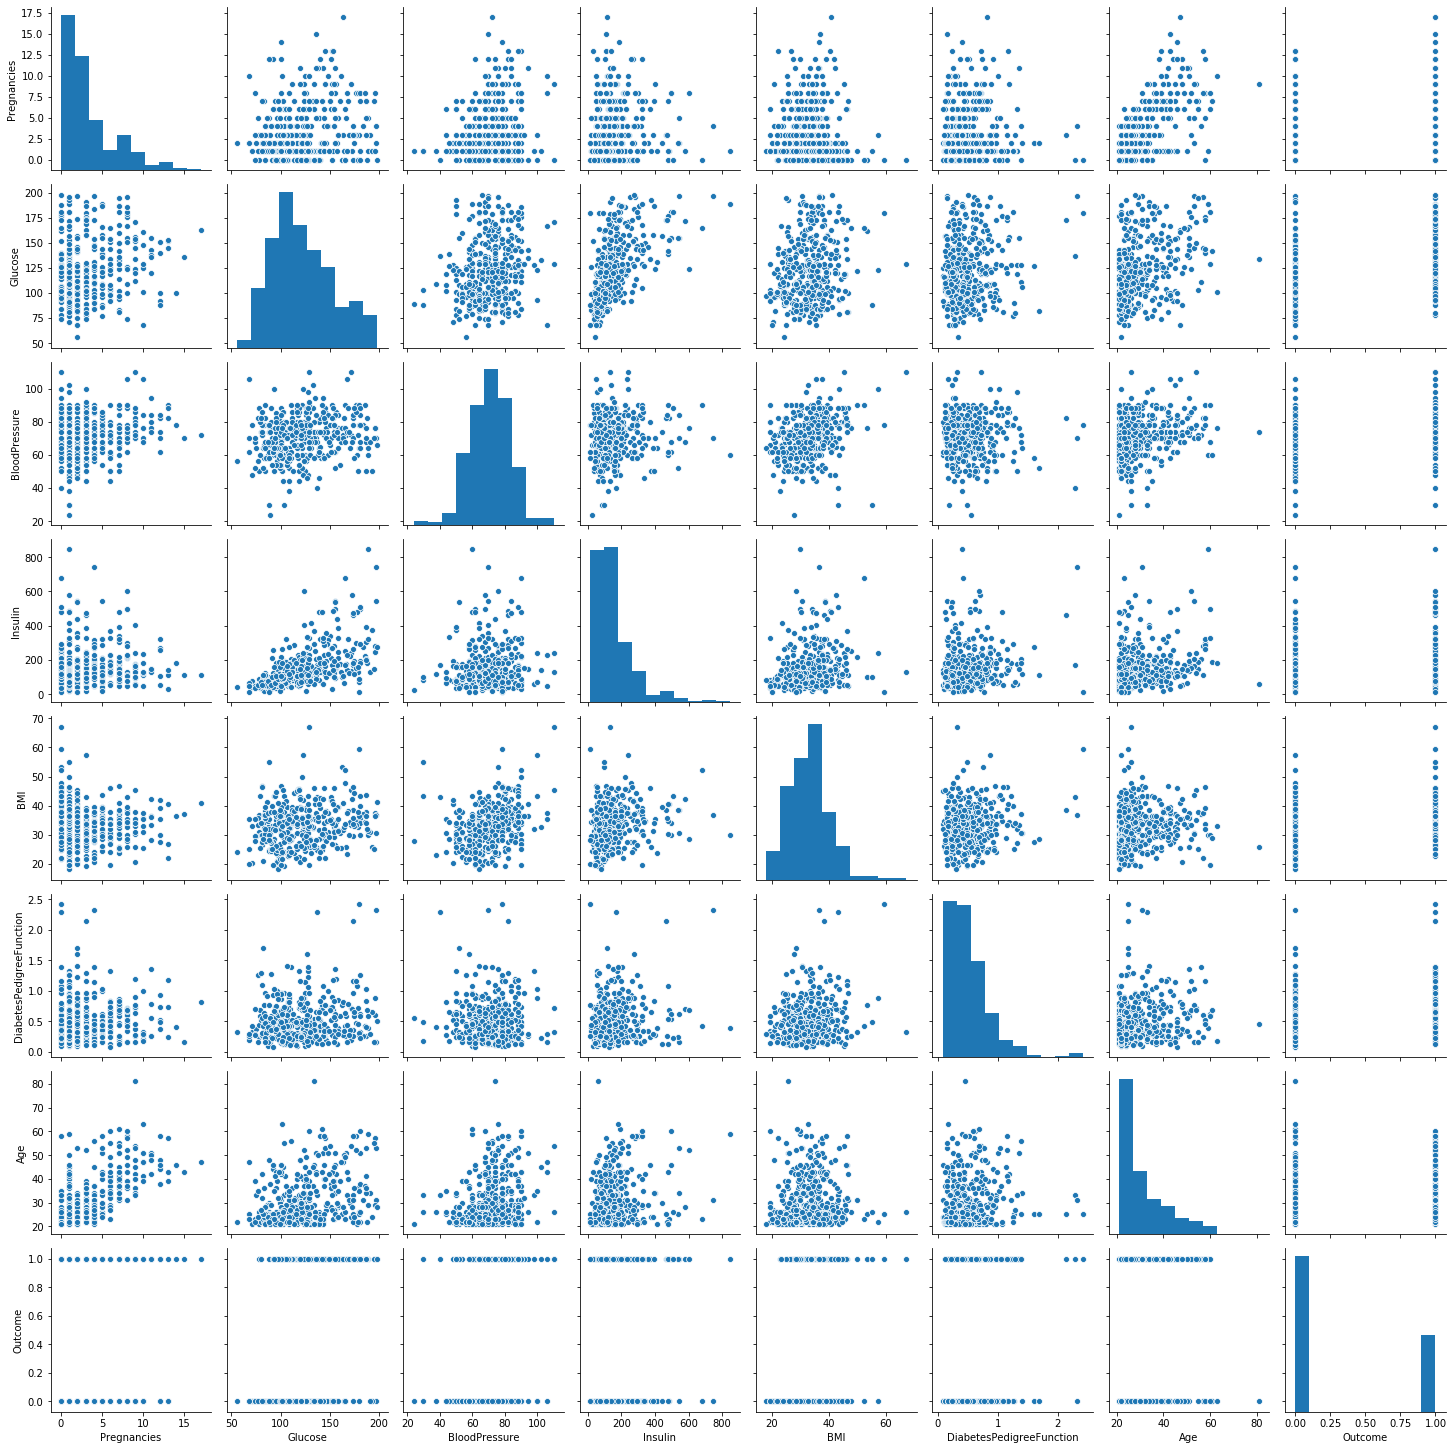

In [34]:
cols = ['Pregnancies','Glucose','BloodPressure','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
sns.pairplot(data[cols], size = 2.5)
plt.show();

In [146]:
X = data.iloc[:,:7]
y = data.iloc[:,8]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
from sklearn.decomposition import PCA
pca = PCA(3)
pca.fit(X)
X = pca.transform(X)
print(pca.n_components_)

3


In [147]:
pca.components_

array([[ 0.17273564,  0.43848086,  0.32893094,  0.4735251 ,  0.40755337,
         0.486568  ,  0.20646351],
       [ 0.34355211,  0.50057541, -0.07620204, -0.44246888,  0.46160742,
        -0.46452195, -0.03080082],
       [-0.58046439,  0.10610594, -0.55871719, -0.01083072,  0.29017429,
         0.04197632,  0.50354471]])

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.711864406779661


In [187]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

model=MLPClassifier(max_iter=30000).fit(X_train,y_train)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))


Accuracy: 0.773 (0.069)


In [191]:
model=RandomForestClassifier().fit(X_train,y_train)
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.796 (0.055)
